![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)
# <font color='GREEN'>DICAS E TRUQUES</font>

# <font color='purple'> Comparação de Máquinas Preditivas - Com ou Sem validação Cruzada </font>
![](https://images.squarespace-cdn.com/content/v1/5feb53185d3dab691b47361b/1609930650139-9NRI63XUJ29Y7E9LEA9G/12eca-machine-learning.gif)

# 1° Importação de Pacotes

In [62]:
# compare algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



In [63]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
cabeçalho = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=cabeçalho)

In [65]:
# shape
print(dataset.shape)

(150, 5)


In [67]:
# head
print(dataset.head(25))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [68]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [71]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [72]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(1,4), sharex=False, sharey=False)
pyplot.show()

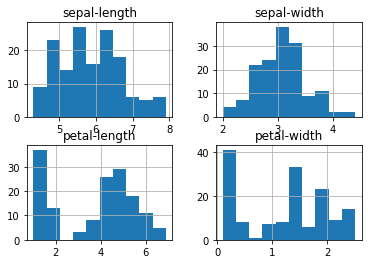

In [73]:
# histograms
dataset.hist()
pyplot.show()

In [76]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]

#X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
# Criar uma Lista de Algoritmos a serem utilizados
models = []

# Fazer um append (acrescentar) na lista 'models' 
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))


In [ ]:
# Make predictions on validation dataset
#model = SVC(gamma='auto')
#model.fit(X_train, Y_train)
#predictions = model.predict(X_validation)

In [ ]:
# Evaluate predictions
#print(accuracy_score(Y_validation, predictions))
#print(confusion_matrix(Y_validation, predictions))
#print(classification_report(Y_validation, predictions))

In [77]:

# evaluate each model in turn
resultado = []
names = []

for name, model in models:

	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 

	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
 

	resultado.append(cv_results)
 

	names.append(name)
 

	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
 


LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)
DT: 0.950000 (0.055277)
GBM: 0.958333 (0.041667)
ET: 0.958333 (0.041667)
RF: 0.950000 (0.040825)
XGB: 0.958333 (0.041667)


In [78]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
# make predictions
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))





        models.append(('DT', DecisionTreeClassifier()))
        models.append(('GBM', GradientBoostingClassifier()))
        models.append(('ET', ExtraTreesClassifier()))
        models.append(('RF', RandomForestClassifier()))
        models.append(('XGB', XGBClassifier()))

#Fim

## Valeu!

### # Onde me Encontrar - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

In [ ]:
from IPython.core.display import HTML
HTML('<<iframe width="360" height="180" src="https://www.youtube.com/embed/d5y4oY47Jbg" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')